# Dependências

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Coleta de Dados

In [2]:
df = pd.read_excel('Resources/teste_smarkio_Lbs.xls', sheet_name = [0])[0]
df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


# Limpeza de Dados

In [3]:
#Verifica se existem valores faltantes
df.isnull().sum()

Pred_class         0
probabilidade      0
status             0
True_class       462
dtype: int64

In [4]:
#Preenche os valores nulos a coluna Pred_class 
df['True_class'] = df['True_class'].fillna(value=df['Pred_class'])
df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0


In [5]:
#Verifica se ainda tem valores faltantes
df.isnull().sum()

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

# Item 1 - Análise Descritiva

In [6]:
#Descrição inicial da tabela
df.describe()

,Pred_class,probabilidade,True_class
count,643.000000,643.000000,643.000000
mean,52.712286,0.622436,48.251944
std,37.602068,0.266811,38.542269
min,2.000000,0.043858,0.000000
25%,12.000000,0.408017,3.000000
50%,59.000000,0.616809,55.000000
75%,81.000000,0.870083,77.000000
max,118.000000,1.000000,118.000000


#### Não há muitas conclusões observando está tabela de informações estatísticas gerais.

#### É preciso fazer uma análise em cima de cada feature.

In [7]:
#Quantidade de padrões e features na tabela
df.shape

(643, 4)

In [8]:
#Classes da coluna 'Pred_class'
np.sort(df['Pred_class'].unique())

array([  2,   3,   4,  11,  12,  15,  17,  19,  21,  22,  24,  25,  26,
        28,  29,  30,  31,  32,  33,  36,  39,  40,  43,  46,  48,  49,
        50,  52,  54,  55,  56,  58,  59,  60,  62,  63,  64,  65,  66,
        68,  69,  70,  73,  74,  76,  77,  78,  79,  81,  82,  84,  85,
        86,  87,  88,  90,  92,  93,  94,  95,  96,  98,  99, 100, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 118], dtype=int64)

In [9]:
#Quantidade de classes da coluna 'Pred_class'
df['Pred_class'].unique().size

80

Text(0.5, 1.0, 'Percentual dos padrões de Pred_class')

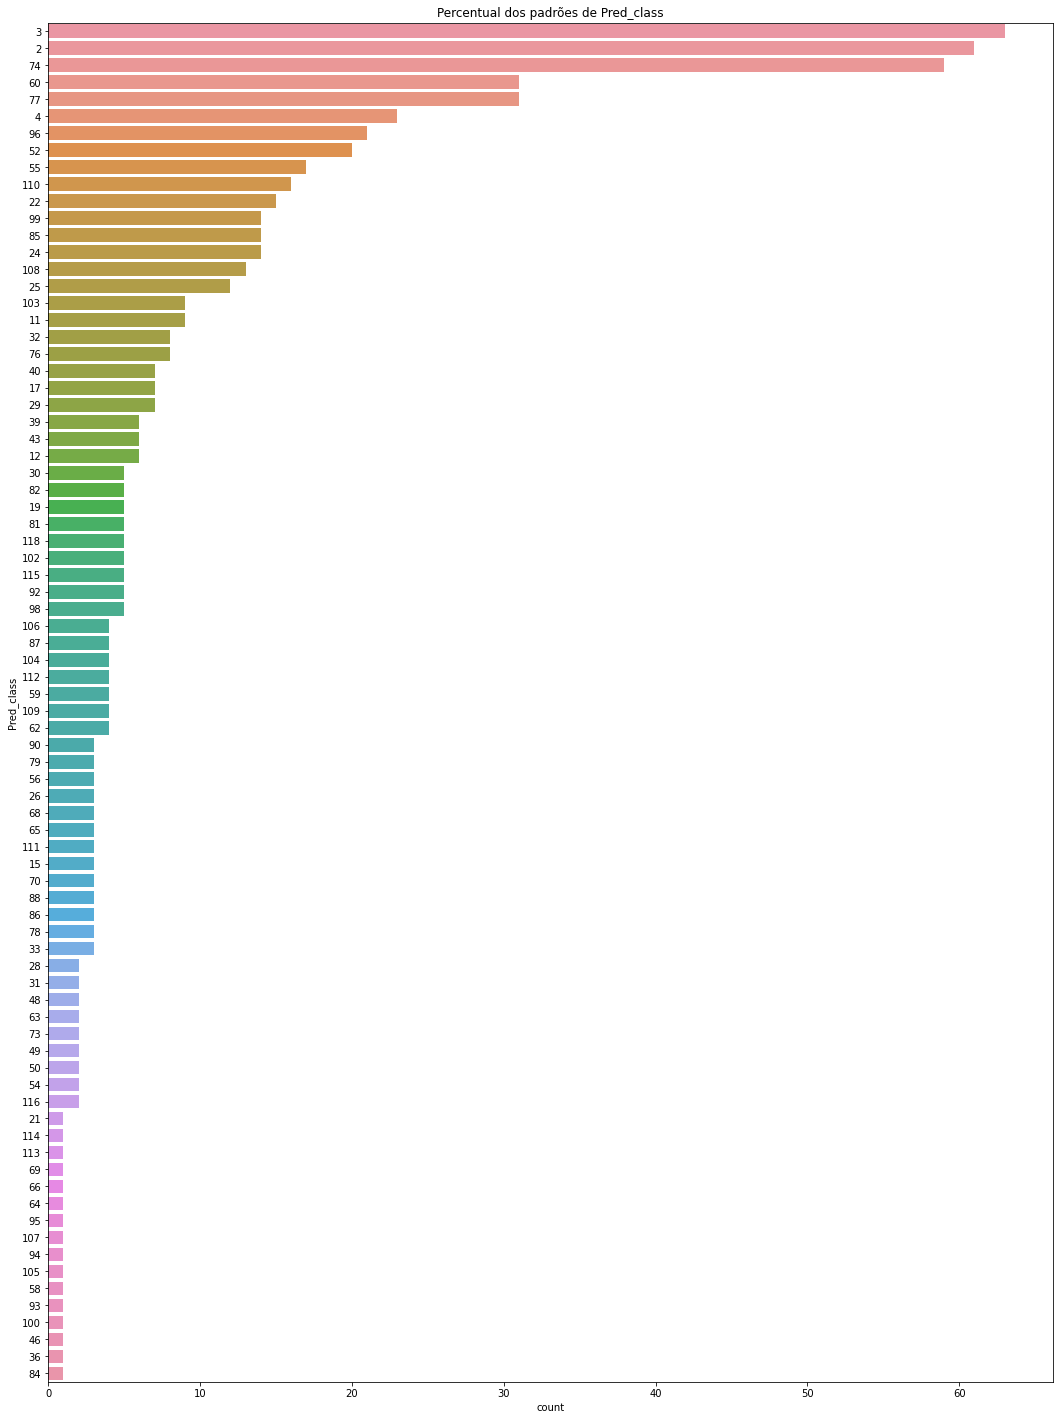

In [10]:
#Visualizar o gráfico de dados da coluna 'Pred_class'

fig = plt.figure(figsize=(18, 25))

sns.countplot(y=df['Pred_class'], 
              orient='h',
              order=df['Pred_class'].value_counts().index)

#Título
plt.title('Percentual dos padrões de Pred_class')

#### Observamos uma ocorrência maior das classes 3, 2 e 74. 

In [11]:
#Classes da coluna 'True_class'
np.sort(df['True_class'].unique())

array([  0.,   2.,   3.,   4.,  11.,  12.,  15.,  17.,  19.,  22.,  24.,
        25.,  26.,  28.,  29.,  30.,  32.,  36.,  39.,  40.,  43.,  46.,
        48.,  52.,  54.,  55.,  56.,  58.,  59.,  60.,  62.,  63.,  65.,
        66.,  68.,  69.,  70.,  73.,  74.,  76.,  77.,  78.,  79.,  81.,
        82.,  84.,  85.,  86.,  87.,  88.,  90.,  92.,  93.,  94.,  96.,
        98.,  99., 100., 102., 103., 104., 106., 107., 108., 110., 111.,
       112., 113., 114., 115., 116., 117., 118.])

In [12]:
#Quantidade de classes da coluna 'True_class'
df['True_class'].unique().size

73

Text(0.5, 1.0, 'Percentual dos padrões de True_class')

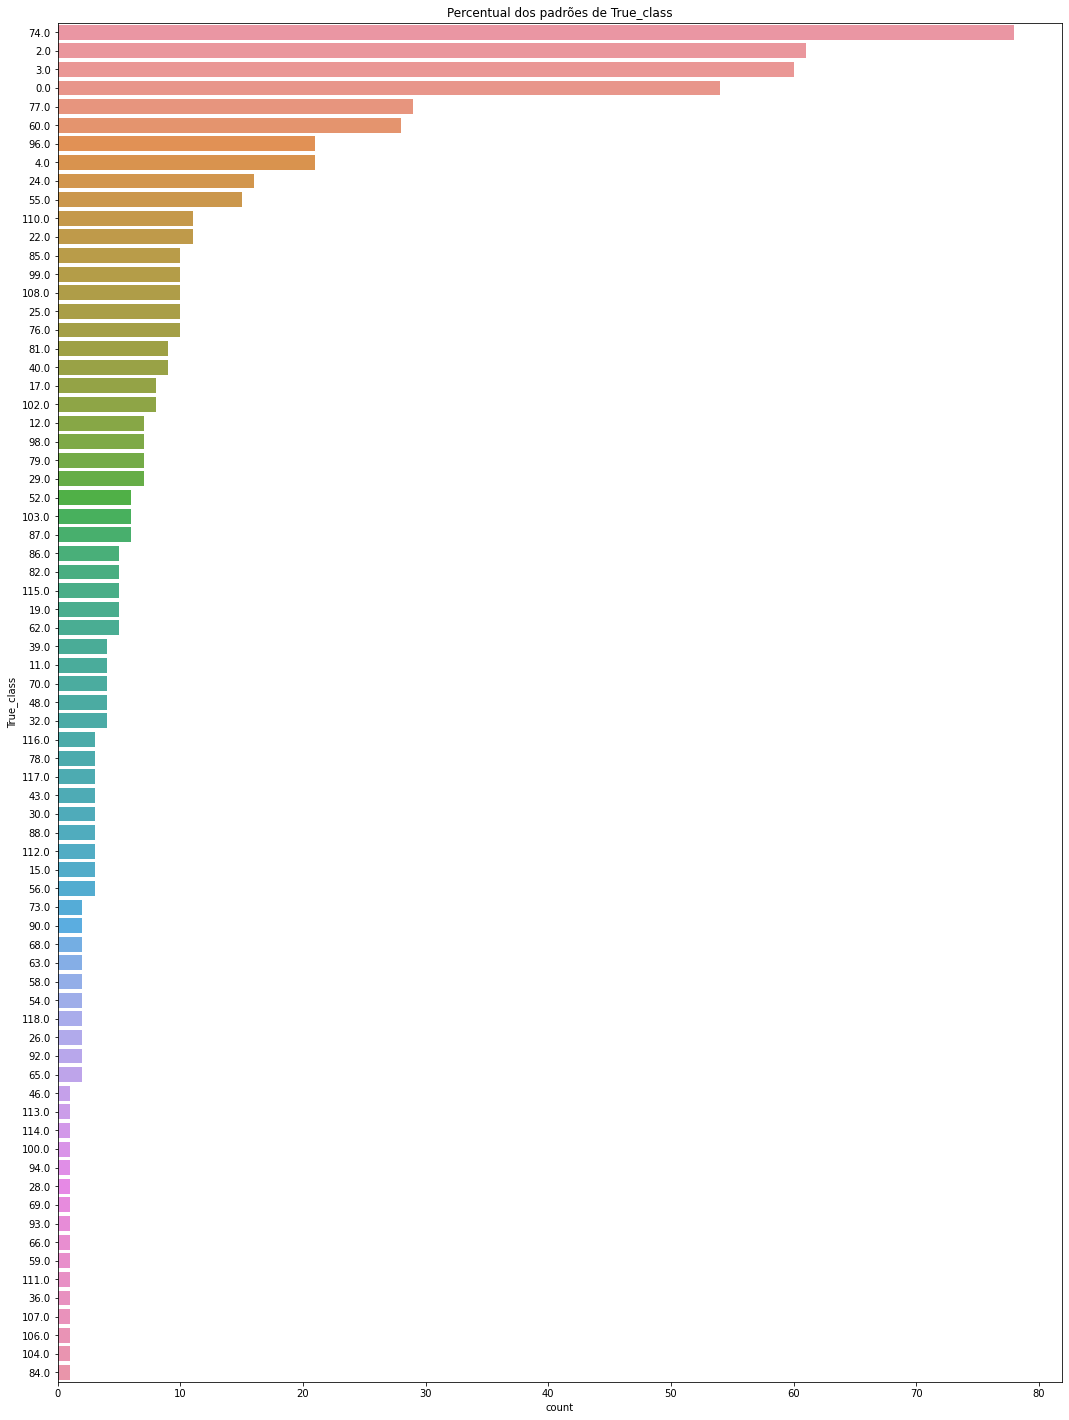

In [13]:
#Visualizar o gráfico de dados da coluna 'True_clas'

fig = plt.figure(figsize=(18, 25))

sns.countplot(y=df['True_class'], 
              orient='h',
              order=df['True_class'].value_counts().index)

#Título
plt.title('Percentual dos padrões de True_class')

#### Observamos uma ocorrência maior das classes 74, 2, 3, e 0

In [14]:
#Quantidade de classes da coluna 'status'
df['status'].unique().size

2

In [15]:
#Classes da coluna 'True_class'
np.sort(df['status'].unique())

array(['approved', 'revision'], dtype=object)

Text(0.5, 1.0, 'Percentual dos padrões de status')

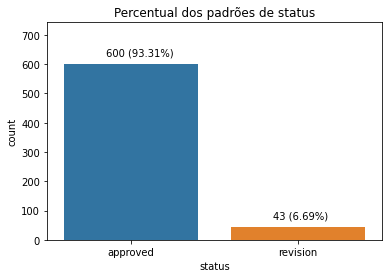

In [16]:
#Visualizar o gráfico de dados da coluna 'status'
ax = sns.countplot(x = df['status'])

#Apresenta informações quantitativas
for p in ax.patches:
    ax.annotate('{1:} ({0:.2f}%)'.format((p.get_height()/len(df['status']))*100, p.get_height()), (p.get_x()+0.25, p.get_height()+30))


#Define uma altura dinâmica.    
ax.set_ylim(0, df.shape[0]+100)

#Título
plt.title('Percentual dos padrões de status')

#### Nota se a quantidade de predições com o status de "aproved" (93,31%), diferente do status de "revision" (6.69%)

#### Conclusão:  Não foi analisado distribuições e correlações, porque não tem dados suficientes para fazer uma análise mais robusta.

# Item 2 - Avaliação de Métricas

Accurancy (taxa de acerto) : (verdadeiro positivos + verdadeiros negativos) / tamanho dos dados

Precision : verdadeios positivos / (veidadeiros positivos + falsos positivos)

Recall : verdadeios positivos / (veidadeiros positivos + falsos negativos)

Classification_report: precision, recall, f1_score e support de cada classe

matrix_confusion: comparação entre valores preditos e valores verdadeiros

In [17]:
#Taxa de acerto
print("Accuracy: {0:.2f}%".format(accuracy_score(df['True_class'],df['Pred_class'])*100), "dos dados previsto estão corretos")

Accuracy: 71.85% dos dados previsto estão corretos


In [18]:
#Recall
print("Recall com average = 'micro' : {0:.2f}%".format(recall_score(df['True_class'],df['Pred_class'], average='micro')*100))
print("Recall com average = 'macro' : {0:.2f}%".format(recall_score(df['True_class'],df['Pred_class'], average='macro', zero_division=0)*100))

Recall com average = 'micro' : 71.85%
Recall com average = 'macro' : 69.98%


In [19]:
#Precision
print("Precision com average = 'micro' : {0:.2f}%".format(precision_score(df['True_class'],df['Pred_class'], average='micro')*100))
print("Precision com average = 'macro' : {0:.2f}%".format(precision_score(df['True_class'],df['Pred_class'], average='macro', zero_division=0)*100))

Precision com average = 'micro' : 71.85%
Precision com average = 'macro' : 62.87%


In [20]:
#F1
print("f1_score com average = 'micro' : {0:.2f}%".format(f1_score(df['True_class'],df['Pred_class'], average='micro')*100))
print("f1_score com average = 'macro' : {0:.2f}%".format(f1_score(df['True_class'],df['Pred_class'], average='macro', zero_division=0)*100))

f1_score com average = 'micro' : 71.85%
f1_score com average = 'macro' : 63.52%


In [21]:
#Report
print(classification_report(df['True_class'],df['Pred_class'], zero_division=0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         2.0       0.77      0.77      0.77        61
         3.0       0.79      0.83      0.81        60
         4.0       0.78      0.86      0.82        21
        11.0       0.44      1.00      0.62         4
        12.0       0.83      0.71      0.77         7
        15.0       0.67      0.67      0.67         3
        17.0       0.86      0.75      0.80         8
        19.0       0.40      0.40      0.40         5
        21.0       0.00      0.00      0.00         0
        22.0       0.67      0.91      0.77        11
        24.0       0.71      0.62      0.67        16
        25.0       0.83      1.00      0.91        10
        26.0       0.33      0.50      0.40         2
        28.0       0.50      1.00      0.67         1
        29.0       1.00      1.00      1.00         7
        30.0       0.60      1.00      0.75         3
        31.0       0.00    

In [22]:
#Matriz de confusão
confusionMatrix = confusion_matrix(df['True_class'],df['Pred_class'])
confusionMatrix

array([[ 0,  2,  2, ...,  0,  0,  0],
       [ 0, 47,  0, ...,  0,  0,  0],
       [ 0,  1, 50, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

### Conclusões

#### 2.1 Considerando a análise descritiva dos dados, temos que o modelo prediz mais classes (80 Pred_class) que realmente é (73 True_class). Ou seja, o modelo prediz mais classes que o real

#### 2.2 Isso implica em erros consideravéis. 

#### 2.3 A classe '0' presente na True_class com 54 padrões, foram negligenciados na Pred_class, o que causa muitos erros na avaliação das métricas; 

#### 2.4 A metricas apresentaram valores semelhantes, porque novamente temos poucos dados. 

In [23]:
#Verifica a quantidade de erros da classe "0"

me = []

for i in range(len(df['True_class'])):
    if df['True_class'].iloc[i] == 0:
        me.append(df['Pred_class'].iloc[i])
        
df_me = pd.DataFrame(me, index=None, columns= ['valor'])

for i in df_me['valor'].unique():
    print(i, ' quantidade ', sum(df_me['valor'] == i))

2  quantidade  2
33  quantidade  1
50  quantidade  2
64  quantidade  1
74  quantidade  1
92  quantidade  1
104  quantidade  1
109  quantidade  2
110  quantidade  3
19  quantidade  1
52  quantidade  14
39  quantidade  1
90  quantidade  1
11  quantidade  1
21  quantidade  1
22  quantidade  1
30  quantidade  1
31  quantidade  1
59  quantidade  3
77  quantidade  1
85  quantidade  1
86  quantidade  2
99  quantidade  2
3  quantidade  2
32  quantidade  4
43  quantidade  1
48  quantidade  1
60  quantidade  1


#### 2.5 A classes "0"  confunde bastante com 14 ocorrência para a classes 52 com e 4 ocorrência a classes 32.

# Item 3 - Aplicação em ML

In [24]:
#Tabela
df.tail(50)

,Pred_class,probabilidade,status,True_class
593,65,0.502442,approved,102.0
594,66,0.247298,approved,58.0
595,74,0.432421,approved,74.0
596,82,0.590576,approved,82.0
597,92,0.915543,approved,92.0
598,96,0.334495,approved,96.0
599,99,0.373226,approved,22.0
600,2,0.752448,revision,2.0
601,24,0.817525,revision,24.0
602,24,0.909148,revision,24.0


In [25]:
#Inserir os valores que possuem o status approved
x_train = df.iloc[:600,0].to_numpy().reshape(-1,1)
y_train = df.iloc[:600,3]

#Inserir os valores que possuem o status revision
x_test = df.iloc[600:,0].to_numpy().reshape(-1,1)
y_test = df.iloc[600:,3]

#Apresenta as dimenções
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((600, 1), (600,), (43, 1), (43,))

In [26]:
#Instância e treina
clf = DecisionTreeClassifier(criterion='entropy') #criando o classificador
clf.fit(x_train, x_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
#Avaliação dos dados de treinamento
cv_scores = cross_val_score(clf, x_train, x_train, scoring='f1_macro', cv = 5).mean()
cv_scores

c:\users\user\desktop\smarkio\venv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9302976206424483

In [28]:
#Avaliação dos dados de teste f1
cv_scores = cross_val_score(clf, x_test, y_test, scoring='f1_macro', cv = 5).mean()
cv_scores

c:\users\user\desktop\smarkio\venv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.643030303030303

In [29]:
#Avaliação dos dados de teste taxa de acerto
cv_scores = cross_val_score(clf, x_test, y_test, scoring='accuracy', cv = 5).mean()
cv_scores

c:\users\user\desktop\smarkio\venv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.7444444444444445

In [30]:
#Prediz uma realização
pred_rev = clf.predict(x_test)
pred_rev

array([  2,  24,  24,  25,  25,  25,  32,  55,  77,  77,  86, 115,  11,
        24,  60,   2,   3,   4,  22,  24,  39,  39,  43,  60,  81,  96,
       112,   2,   3,   3,   4,   4,  12,  17,  24,  33,  43,  55,  60,
        60,  77,  85,  96], dtype=int64)

In [31]:
for i in range(len(pred_rev)):
    print('Valor previsto :', pred_rev[i], 'valor esperado :', y_test.iloc[i])
    if pred_rev[i] != y_test.iloc[i]:
        print('Erro')

Valor previsto : 2 valor esperado : 2.0
Valor previsto : 24 valor esperado : 24.0
Valor previsto : 24 valor esperado : 24.0
Valor previsto : 25 valor esperado : 25.0
Valor previsto : 25 valor esperado : 25.0
Valor previsto : 25 valor esperado : 25.0
Valor previsto : 32 valor esperado : 32.0
Valor previsto : 55 valor esperado : 55.0
Valor previsto : 77 valor esperado : 77.0
Valor previsto : 77 valor esperado : 77.0
Valor previsto : 86 valor esperado : 86.0
Valor previsto : 115 valor esperado : 114.0
Erro
Valor previsto : 11 valor esperado : 11.0
Valor previsto : 24 valor esperado : 24.0
Valor previsto : 60 valor esperado : 60.0
Valor previsto : 2 valor esperado : 2.0
Valor previsto : 3 valor esperado : 3.0
Valor previsto : 4 valor esperado : 4.0
Valor previsto : 22 valor esperado : 22.0
Valor previsto : 24 valor esperado : 24.0
Valor previsto : 39 valor esperado : 39.0
Valor previsto : 39 valor esperado : 39.0
Valor previsto : 43 valor esperado : 43.0
Valor previsto : 60 valor esperado 

# Item 4 - Avaliação de métricas

In [32]:
#Taxa de acerto
print("Accuracy: {0:.2f}%".format(accuracy_score(y_test,pred_rev)*100), "dos dados previsto estão corretos")

Accuracy: 90.70% dos dados previsto estão corretos


In [33]:
#Recall
print("Recall com average = 'micro' : {0:.2f}%".format(recall_score(y_test,pred_rev, average='micro')*100))
print("Recall com average = 'macro' : {0:.2f}%".format(recall_score(y_test,pred_rev, average='macro', zero_division=0)*100))

Recall com average = 'micro' : 90.70%
Recall com average = 'macro' : 69.23%


In [34]:
#Precision
print("Precision com average = 'micro' : {0:.2f}%".format(precision_score(y_test,pred_rev, average='micro')*100))
print("Precision com average = 'macro' : {0:.2f}%".format(precision_score(y_test,pred_rev, average='macro', zero_division=0)*100))

Precision com average = 'micro' : 90.70%
Precision com average = 'macro' : 69.23%


In [35]:
#F1
print("f1_score com average = 'micro' : {0:.2f}%".format(f1_score(y_test,pred_rev, average='micro')*100))
print("f1_score com average = 'macro' : {0:.2f}%".format(f1_score(y_test,pred_rev, average='macro', zero_division=0)*100))

f1_score com average = 'micro' : 90.70%
f1_score com average = 'macro' : 69.23%


### Conclusão:

#### Por ter poucos padrões de treinamento não é possível comparar quais as melhores métricas de avaliação

#### Geralmente a taxa de acerto (accuracy) não é uma boa métrica para dados desbalanceados, porém para pequenos testes pode ser interessante por ser facilmente interpretável.

# Item 5 - Aplicação de NLP

In [36]:
#Captura dos dados
df_NLP = pd.read_excel('Resources/teste_smarkio_Lbs.xls', sheet_name = [1])[1]
df_NLP.head()

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


In [37]:
#Separa os dados em treino e teste 80% e 20%
x_train, x_test, y_train, y_test = train_test_split(df_NLP['letra'], df_NLP['artista'], test_size=0.2)

In [38]:
#Instância o CountVectorizer e transforma
transform = CountVectorizer(stop_words='english').fit(df_NLP['letra'])
transform.vocabulary_

{'jay': 3436,
 'uh': 6913,
 'ready': 5214,
 'let': 3712,
 'em': 2106,
 'look': 3830,
 'young': 7459,
 'cruisin': 1549,
 'west': 7249,
 'highway': 3072,
 'doin': 1905,
 'like': 3758,
 'way': 7210,
 'eyes': 2286,
 'shades': 5753,
 'necklace': 4360,
 'reason': 5228,
 'dates': 1656,
 'blind': 681,
 'today': 6713,
 've': 7017,
 'got': 2799,
 'thoroughest': 6635,
 'girl': 2734,
 'mashin': 3991,
 'gas': 2687,
 'grabbin': 2808,
 'wheel': 7260,
 'true': 6838,
 'heart': 3017,
 'rides': 5401,
 'wit': 7333,
 'new': 4382,
 'bobby': 719,
 'whitney': 7281,
 'time': 6689,
 'don': 1919,
 'speak': 6110,
 'durin': 2036,
 'sex': 5740,
 'city': 1195,
 'gets': 2716,
 'carrie': 1006,
 'feva': 2400,
 'soon': 6074,
 'ova': 4578,
 'right': 5408,
 'souljah': 6084,
 'cuz': 1608,
 'mami': 3950,
 'rida': 5397,
 'rolla': 5465,
 'togetha': 6718,
 'gon': 2785,
 'stop': 6255,
 'whateva': 7258,
 'lacks': 3614,
 'shoulder': 5828,
 'track': 6769,
 'keepin': 3519,
 'focused': 2514,
 'lock': 3810,
 'supposed': 6398,
 '03': 

In [39]:
#Transforma o vocabulário em vetor
x_cv = transform.transform(x_train)
x_text_cv = transform.transform(x_test)

In [40]:
#Instância, Treina e Prediz
clf = MultinomialNB().fit(x_cv, y_train)
pred_NLP = clf.predict(x_text_cv)

In [41]:
#Taxa de acerto
print("Accuracy: {0:.2f}%".format(accuracy_score(y_test,pred_NLP)*100), "dos dados previsto estão corretos")

Accuracy: 70.19% dos dados previsto estão corretos


In [42]:
#F1
print("f1_score com average = 'micro' : {0:.2f}%".format(f1_score(y_test,pred_NLP, average='micro')*100))
print("f1_score com average = 'macro' : {0:.2f}%".format(f1_score(y_test,pred_NLP, average='macro', zero_division=0)*100))

f1_score com average = 'micro' : 70.19%
f1_score com average = 'macro' : 70.19%


In [43]:
pred_NLP

array(['Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Beyoncé',
       'Beyoncé', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Beyoncé',
       'Beyoncé', 'Rihanna', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Beyoncé', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Rihanna', 'Rihanna',
       'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé',
       'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna',
       'Rihanna', 'Beyoncé', 'Rihanna', 'Rihanna', 'Beyoncé', 'Beyoncé',
       'Rihanna', 'Beyoncé', 'Beyoncé', 'Rihanna', 'Rihanna', 'Rihanna',
       'Rihanna', 'Beyoncé', 'Rihanna', 'Rihanna', 

In [44]:
np.array(y_test)

array(['Beyoncé', 'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé',
       'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Beyoncé',
       'Beyoncé', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Rihanna', 'Rihanna',
       'Rihanna', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna', 'Beyoncé', 'Rihanna',
       'Beyoncé', 'Rihanna', 'Beyoncé', 'Beyoncé', 'Rihanna', 'Beyoncé',
       'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Rihanna',
       'Rihanna', 'Beyoncé', 'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna',
       'Rihanna', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé', 'Beyoncé',
       'Beyoncé', 'Beyoncé', 'Rihanna', 'Rihanna', 'Rihanna', 'Beyoncé',
       'Rihanna', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Rihanna', 'Rihanna',
       'Rihanna', 'Rihanna', 'Beyoncé', 'Rihanna', 

# Conclusão geral

#### Seria perfeitamente possível a implementação de Pipelines, GridSearch e outros modelos de aprendizado de máquina, principalmente para otimização de performasse, porém como é mais um teste de conhecimento e os dados são simples fiz da forma mais básica.